In [444]:
# Importing neccessary pacakages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
%matplotlib inline
warnings.filterwarnings("ignore")

In [445]:
#Reading dataset
ionosphereDataset = pd.read_csv('C:/Users/welcome/Documents/Vishal/Book1.csv')

In [446]:
ionosphereDataset

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [495]:
# =============================================== Excercise 1 a
#Reading dataset
ionosphereDataset = pd.read_csv('C:/Users/welcome/Documents/Vishal/Book1.csv')
# We've the categorical dataset, so vectorizing it for easily computation
DictionaryValue = ionosphereDataset.iloc[:,2:].T.to_dict().values()
CategoricalValue = DictVectorizer(sparse=False).fit_transform(DictionaryValue)

# Assinging the respective labels for the categorical data
labelEnc = LabelEncoder()
VectorValue = labelEnc.fit_transform(ionosphereDataset.iloc[:,0])
X_train, X_test, y_train, y_test = train_test_split(CategoricalValue,VectorValue, test_size=0.3,random_state=3) 

In [448]:
print("X Train Dimension ->",np.shape(X_train))
print("Y Train Dimension ->",np.shape(y_train))
print("X Test Dimension ->",np.shape(X_test))
print("Y Test Dimension ->",np.shape(y_test))

X Train Dimension -> (245, 34)
Y Train Dimension -> (245,)
X Test Dimension -> (106, 34)
Y Test Dimension -> (106,)


In [449]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
XTrainData = scaler.transform(X_train)
XTestData = scaler.transform(X_test)

In [450]:
from sklearn.decomposition import PCA
# with 95% of the varaince coverage
pca = PCA(.95)
pca.fit(XTrainData)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [451]:
# Required these many components
pca.n_components_

22

In [452]:
# =============================================== Excercise 1 b

In [496]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X_train_scale = scale(X_train)
X_test_scale = scale(X_test)
pca = PCA(n_components=18)
pca.fit(X_train_scale)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [497]:
XTrainPca= pca.transform(X_train_scale)
XTestPca = pca.transform(X_test_scale)
pcaVariance = pca.explained_variance_ratio_.round(2)
print("X Train dimension after applying PCA 18D",np.shape(XTrainPca))
print("X Test dimension after applying PCA 18D",np.shape(XTestPca))
print(pcaVariance)

X Train dimension after applying PCA 18D (245, 18)
X Test dimension after applying PCA 18D (106, 18)
[0.26 0.13 0.1  0.08 0.06 0.04 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02
 0.02 0.01 0.01 0.01]


In [499]:
# print( pca.components_)

In [512]:
#Reconstructing the dataset with 18 components
import numpy as np
import sklearn.datasets, sklearn.decomposition

X = np.array(ionosphereDataset.iloc[:,2:33])
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)
# PCA reconstruction=PC scores * Eigenvectors⊤ + Mean
nComp = 18
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

Xhat

array([[ 0.99603   , -0.06570292,  0.80076631, ...,  0.30869253,
        -0.50360814,  0.25804381],
       [ 0.92879187, -0.04386968,  0.78040911, ..., -0.14717289,
        -0.40545801, -0.53182925],
       [ 1.01814194,  0.03792802,  0.93989273, ...,  0.58030967,
        -0.25031048,  0.56559714],
       ...,
       [ 0.94039014, -0.01144458,  0.9406875 , ...,  0.91219501,
        -0.00212462,  0.88823416],
       [ 0.87149983, -0.04885654,  0.99205394, ...,  0.93018354,
        -0.04890997,  0.88648093],
       [ 0.86823872,  0.09932001,  0.77142672, ...,  0.78273822,
        -0.04751468,  0.77063878]])

In [513]:
# Calculating the MSE between original and reconstructed
summation = 0
n = len(X) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
    difference = X[i] - Xhat[i]  #finding the difference between observed and predicted/resconstructed value
    squared_difference = difference**2  #taking square of the differene 
    summation = summation + squared_difference  #taking a sum of all the differences
    MSE = summation/n  #dividing summation by total values to obtain average
    print ("The Mean Square Error is: " , MSE)


The Mean Square Error is:  [1.16696891e-09 1.32239155e-07 7.60437899e-06 2.54239458e-05
 4.32685674e-06 1.31749438e-06 4.06098761e-06 7.54059575e-07
 8.73158455e-06 7.09420492e-06 2.81347127e-05 2.14561858e-05
 1.89178164e-05 6.84009308e-06 1.19649322e-07 1.62876565e-05
 1.55379250e-05 3.27244858e-05 3.60261814e-06 6.21683528e-08
 3.87672402e-05 7.99192507e-07 2.95362633e-05 1.13990485e-05
 1.54445792e-05 1.78229619e-06 1.88645913e-05 5.35664737e-06
 3.70110056e-05 4.85054379e-06 1.46193821e-05]
The Mean Square Error is:  [1.44473126e-05 5.95545424e-05 7.16564356e-05 3.26299502e-04
 4.89558450e-04 5.11733465e-06 1.34494386e-04 1.61057812e-04
 7.53923986e-05 2.89661570e-05 4.66214692e-04 3.93088571e-05
 4.96286374e-05 9.19725159e-05 8.32742144e-05 2.18466240e-04
 3.25828655e-05 3.27327210e-05 3.36327119e-05 1.70258548e-06
 4.74844863e-04 3.31238282e-05 6.68888497e-05 4.69149249e-05
 1.46030864e-04 2.35219486e-06 1.12637347e-04 9.73884027e-05
 3.80489475e-05 3.39208649e-04 4.57896334e-04

 0.00951521]
The Mean Square Error is:  [0.00796837 0.01015637 0.00942223 0.01028563 0.00685575 0.00628252
 0.0092833  0.00338161 0.01164029 0.00751184 0.00922745 0.00469163
 0.01137724 0.0099476  0.01287393 0.00425777 0.00966783 0.0087168
 0.00797443 0.00431391 0.00984041 0.00399883 0.01224609 0.00471347
 0.00646268 0.00977544 0.00972871 0.00682771 0.00658421 0.00968729
 0.00951542]
The Mean Square Error is:  [0.00797327 0.01021699 0.00958821 0.01034487 0.00709584 0.00641921
 0.00929923 0.00343514 0.01358964 0.0080347  0.00936032 0.00469291
 0.01157974 0.012296   0.01334437 0.00463941 0.00971595 0.00924428
 0.00798288 0.00435939 0.00998088 0.00442609 0.01424572 0.00484212
 0.00646332 0.01028604 0.0117489  0.00692115 0.00737649 0.00969178
 0.0112868 ]
The Mean Square Error is:  [0.00797517 0.0102179  0.00958973 0.01035502 0.00709866 0.0064216
 0.00930424 0.00343674 0.01359043 0.00803786 0.0093716  0.00469577
 0.01157974 0.01230445 0.01334451 0.00464203 0.00971689 0.00924485
 0.00800558

 0.02175236]
The Mean Square Error is:  [0.01728667 0.02077003 0.01592527 0.01752038 0.01560475 0.00989638
 0.02090709 0.00593161 0.02273945 0.01548707 0.01821332 0.0101698
 0.01880433 0.01927553 0.02194112 0.0083295  0.0141109  0.01652568
 0.01523938 0.00764158 0.01854007 0.00890406 0.02333123 0.00956076
 0.01272596 0.02054367 0.02146086 0.01346985 0.01307722 0.01815582
 0.02176234]
The Mean Square Error is:  [0.01728699 0.02120992 0.01597779 0.01784538 0.01605638 0.01013743
 0.02101715 0.00613854 0.02289995 0.0160597  0.01837909 0.01018425
 0.0195938  0.01960804 0.02204802 0.00837504 0.01412092 0.01708957
 0.01569503 0.00789875 0.01874644 0.00963131 0.02343177 0.01081726
 0.01278424 0.02148132 0.0217264  0.01350247 0.01332507 0.01862296
 0.02334489]
The Mean Square Error is:  [0.0172894  0.02121801 0.01597795 0.01784662 0.01605702 0.01014089
 0.02101722 0.00614144 0.0229     0.01605973 0.01839904 0.01018562
 0.01963276 0.01961239 0.02206957 0.00837729 0.01413801 0.0170897
 0.01569741

 0.03119202]
The Mean Square Error is:  [0.02642906 0.02968734 0.0216001  0.02769    0.0273999  0.01462167
 0.03152193 0.01020958 0.03374478 0.0217333  0.03273384 0.01548244
 0.03009281 0.02592856 0.03160644 0.01328214 0.02547918 0.02569119
 0.02293319 0.01357405 0.02981953 0.01292299 0.033489   0.0173157
 0.01666346 0.0304701  0.02834603 0.01840652 0.01771213 0.0259905
 0.03119483]
The Mean Square Error is:  [0.02648061 0.02968956 0.02161592 0.02789979 0.02755806 0.01469834
 0.03164919 0.01039032 0.03405706 0.0217646  0.03274321 0.01551396
 0.03011543 0.02593038 0.03182973 0.01328335 0.02552229 0.02576042
 0.02295306 0.0136095  0.03012296 0.01301824 0.03433482 0.01744022
 0.01722834 0.03137539 0.02874925 0.01841957 0.01774195 0.02639197
 0.03148527]
The Mean Square Error is:  [0.0264807  0.02969378 0.02161828 0.02790326 0.02755813 0.0146984
 0.0316494  0.01039036 0.03405727 0.02176498 0.03274363 0.01551442
 0.03011598 0.02593076 0.03183211 0.01328397 0.02552244 0.02576245
 0.02295306 

 0.03294799]
The Mean Square Error is:  [0.02792238 0.03144312 0.02316295 0.02911543 0.02871831 0.01583398
 0.03307816 0.01125026 0.0349156  0.02308419 0.03730024 0.01682548
 0.03481253 0.02726713 0.03285767 0.01459659 0.02674159 0.02851093
 0.02459996 0.01484231 0.03105248 0.01366672 0.03539913 0.01874074
 0.01807779 0.03336197 0.02965189 0.01898817 0.01872057 0.02768062
 0.03294939]
The Mean Square Error is:  [0.02792248 0.03144465 0.02316383 0.02911649 0.02871852 0.01583539
 0.03307967 0.01125064 0.03491562 0.0230859  0.03730025 0.01682566
 0.03482205 0.02726719 0.03286217 0.0145975  0.02674184 0.02851392
 0.02460008 0.01484289 0.03105289 0.01366952 0.03539951 0.01874187
 0.01807804 0.03336222 0.02965731 0.01898921 0.01872237 0.02768065
 0.03295005]
The Mean Square Error is:  [0.02792255 0.03144765 0.02316489 0.02911913 0.02871882 0.0158358
 0.03308136 0.01125197 0.03491571 0.02308835 0.03730419 0.01682574
 0.03482928 0.02726719 0.03286771 0.01459875 0.02674184 0.02851548
 0.0246013

In [ ]:
# Steps for MSE
# - Calculate the difference between each pair of the observed and predicted value
# - Take the square of the difference value
# - Add each of the squared differences to find the cumulative values
# - In order to obtain the average value, divide the cumulative value by the total number of items in the array

In [ ]:
# The main purpose of PCA is to find the subset of features of our dataset that best encaptures information on the whole data so that we can reduce dimensions with minimal loss of information

# To compute the reconstruction error, we can calculate the mean squared error comparing each value between the original image and the reconstructed dataset.

In [486]:
# PCA reconstruction=PC scores * Eigenvectors⊤ + Mean
nComp = 22
Xhat1 = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat1 += mu

Xhat1

array([[ 1.01561857, -0.08091557,  0.82347788, ...,  0.34164828,
        -0.52785039,  0.232169  ],
       [ 0.92246315,  0.01783713,  0.69126361, ..., -0.06671398,
        -0.41913721, -0.51075781],
       [ 0.97628806,  0.09438698,  0.97490697, ...,  0.5799936 ,
        -0.25287053,  0.60789791],
       ...,
       [ 0.95886329,  0.01339825,  0.93277288, ...,  0.92869899,
         0.01355119,  0.89471572],
       [ 0.92422365, -0.02769147,  0.97787806, ...,  0.95544288,
        -0.01747379,  0.88039612],
       [ 0.86511909,  0.1372902 ,  0.77113358, ...,  0.787805  ,
        -0.03185364,  0.79330247]])

In [491]:
Xhat1 - Xhat

array([[ 0.01958856, -0.01521264,  0.02271157, ...,  0.03295575,
        -0.02424225, -0.02587481],
       [-0.00632873,  0.06170681, -0.0891455 , ...,  0.08045892,
        -0.0136792 ,  0.02107144],
       [-0.04185388,  0.05645896,  0.03501424, ..., -0.00031606,
        -0.00256005,  0.04230077],
       ...,
       [ 0.01847315,  0.02484283, -0.00791462, ...,  0.01650398,
         0.01567581,  0.00648156],
       [ 0.05272382,  0.02116507, -0.01417588, ...,  0.02525933,
         0.03143619, -0.00608481],
       [-0.00311963,  0.03797019, -0.00029314, ...,  0.00506678,
         0.01566103,  0.02266369]])

Populating the interactive namespace from numpy and matplotlib


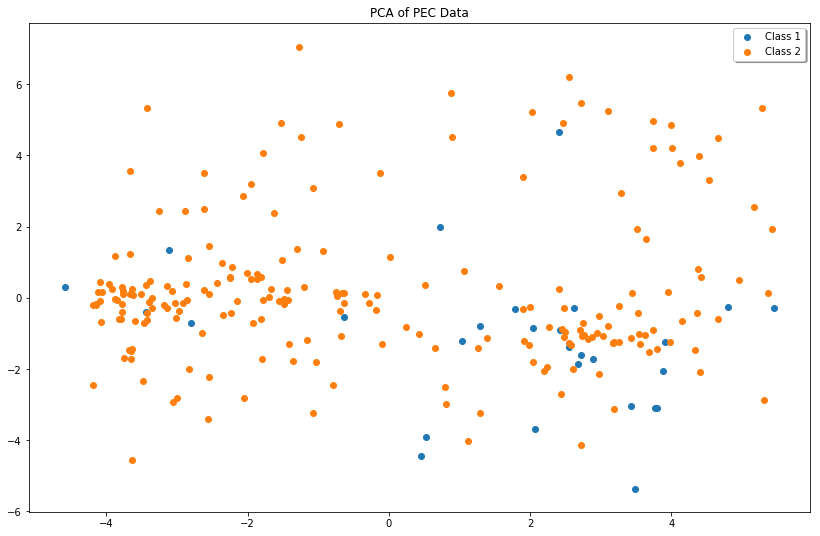

In [456]:
# ======================================= Excercise 1 c
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)
target_names = ['Class 1' , 'Class 2']
colors = ['blue', 'orange']
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
    plt.scatter(XTrainPca[y_train == i, 0], XTrainPca[y_train == i, 1], label=target_name)
    plt.legend(loc='best', shadow=True, scatterpoints=1)
    plt.title('PCA of PEC Data')
plt.show()

In [457]:
# ======================================= Excercise 2
#Reading dataset
ionosphereDataset = pd.read_csv('C:/Users/welcome/Documents/Vishal/Book1.csv')
# We've the categorical dataset, so vectorizing it for easily computation
DictionaryValue = ionosphereDataset.iloc[:,2:].T.to_dict().values()
CategoricalValue = DictVectorizer(sparse=False).fit_transform(DictionaryValue)

# Assinging the respective labels for the categorical data
labelEnc = LabelEncoder()
VectorValue = labelEnc.fit_transform(ionosphereDataset.iloc[:,0])
X_train, X_test, y_train, y_test = train_test_split(CategoricalValue,VectorValue, test_size=0.3,random_state=3) 

In [458]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

distances = 1-CategoricalValue
D = 2
N = distances.shape[0]  # the number of items

# euclidean distance between 2 any given points
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def stress(p):
    stress_sum = 0
    for i in np.arange(0, N):
        for j in np.arange(i+1, distances.shape[1]):
            stress_sum += (distances[i,j] - dist(p[i], p[j]))**2
    return stress_sum

# helper function for compute_gradient
def add_delta(p, i, d, delta):
    v = np.array(p)
    v[i, d] += delta
    return v

# gradient descent on each element of p
def compute_gradient(p, i, d, delta):
    return (stress(add_delta(p, i, d, delta)) - stress(add_delta(p, i, d, -delta))) / (2*delta)

def compute_full_gradient(p):
    matrix = []
    for i in np.arange(0,len(p)):
        row = []
        
        for d in np.arange(0,len(p[i])):
            row.append(compute_gradient(p, i, d, .001))
        
        matrix.append(row)

    return np.array(matrix)

In [459]:
def MDS():
    pos = np.random.normal(0.0, 1.0, (N, D))
    print("Original stress: " + str(stress(pos)))

    steps = 0
    stress_list = np.array([])
    iterations = np.array([])
    while (steps <= 3):
        step_size = .001 * compute_full_gradient(pos)
        pos -= step_size
        stress_list = np.append(stress(pos), stress_list)
        iterations = np.append(steps, iterations)

        steps += 1

    print("New stress: " + str(stress(pos)))
    return pos


Original stress: 1492.1703987232852
New stress: 963.2311686800758


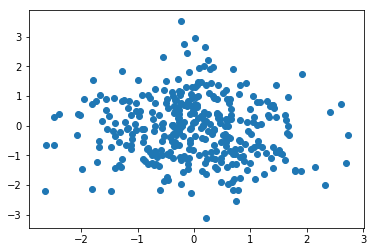

In [460]:
def plot(pos):
    x_data = np.array([])
    y_data = np.array([])
    
    for i in np.arange(0,len(pos)):
        x_data = np.append(pos[i, 0], x_data)
        y_data = np.append(pos[i, 1], y_data)

    plt.scatter(x_data, y_data)

main_pos = MDS()
plot(main_pos)

In [461]:
def plotting_data(pos):
    x_data = np.array([])
    y_data = np.array([])
    
    for i in np.arange(0,len(pos)):
        x_data = np.append(pos[i, 0], x_data)
        y_data = np.append(pos[i, 1], y_data)
    return [x_data, y_data]

Original stress: 1446.6561844023709
New stress: 938.083516748557


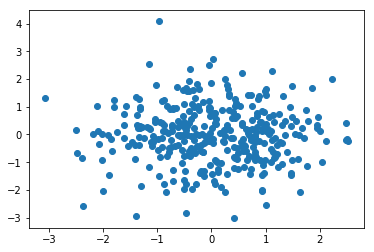

In [462]:
MDS1 = MDS()
MDS1_data = plotting_data(MDS1)
plt.scatter(MDS1_data[0], MDS1_data[1], label='MDS Run 1')

Original stress: 923.1195209032105
New stress: 631.7389011345668


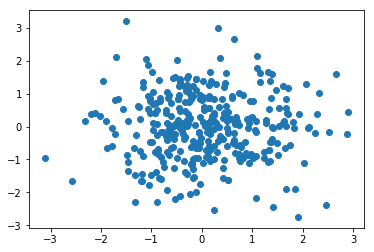

In [463]:
MDS2 = MDS()
MDS2_data = plotting_data(MDS2)
plt.scatter(MDS2_data[0], MDS2_data[1], label='MDS Run 2')

Original stress: 1808.5394563755826
New stress: 1141.9849975690727


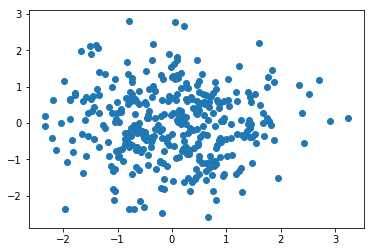

In [464]:
MDS3 = MDS()
MDS3_data = plotting_data(MDS3)
plt.scatter(MDS3_data[0], MDS3_data[1], label='MDS Run 3')

These plots are not all the same. Since they all begin at different initial positions, the clusters move towards different parts of the graph. Since the MDS algorithm simply works off of absolute distances, the placement of each point shifts everytime it runs, however the distances between each point should remain the same

The best run was run 2, with resulting stress 631.7389011345668. The plot is shown again below


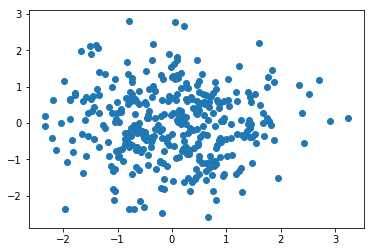

In [465]:
a = [stress(MDS1), stress(MDS2), stress(MDS3)]
best = min(a)
optimal = a.index(best)
print(f"The best run was run {optimal + 1}, with resulting stress {best}. The plot is shown again below")
plt.scatter(MDS3_data[0], MDS3_data[1], label='MDS Run 3')


The "best run" out of the 3 runs by calculating which run came out with the lowest resulting stress, since the stress value is essentially a measure of error.

In [466]:
# ====================================> Excercise 3
# =====================================Decision Tree with max_depth=5
#importing the necessay packages

import numpy as numpy
import pandas as panda
import matplotlib.pyplot as pyplot
import seaborn as seasns

from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
#Reading dataset
ionosphereDataset = pd.read_csv('C:/Users/welcome/Documents/Vishal/Book1.csv')

In [467]:
# We've the categorical dataset, so vectorizing it for easily computation
DictionaryValue = ionosphereDataset.iloc[:,1:].T.to_dict().values()
CategoricalValue = DictVectorizer(sparse=False).fit_transform(DictionaryValue)

# Assinging the respective labels for the categorical data
labelEnc = LabelEncoder()
VectorValue = labelEnc.fit_transform(ionosphereDataset.iloc[:,0])

   size_threshold  Accuracy
0             4.0    0.8169
1             6.0    0.8028
2             8.0    0.7606
3            10.0    0.7606
4            12.0    0.8310


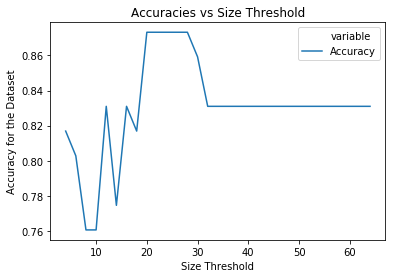

   size_threshold  Accuracy
0             4.0    0.8429
1             6.0    0.8429
2             8.0    0.8429
3            10.0    0.8429
4            12.0    0.8857


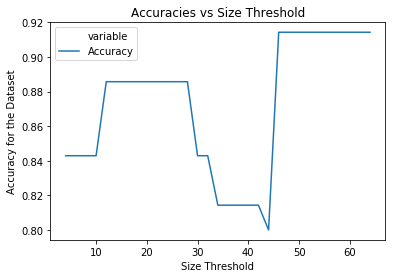

   size_threshold  Accuracy
0             4.0    0.8143
1             6.0    0.8286
2             8.0    0.8429
3            10.0    0.8143
4            12.0    0.8143


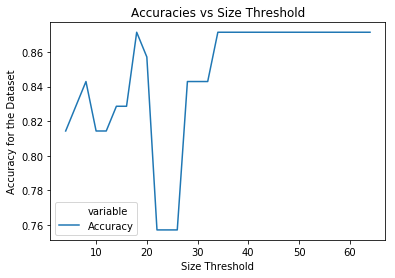

   size_threshold  Accuracy
0             4.0    0.8429
1             6.0    0.8429
2             8.0    0.8857
3            10.0    0.8857
4            12.0    0.8857


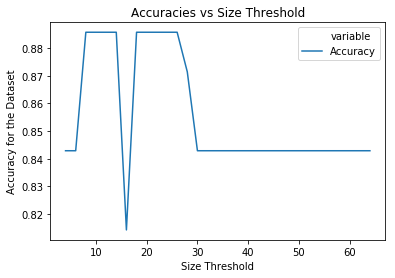

   size_threshold  Accuracy
0             4.0       1.0
1             6.0       1.0
2             8.0       1.0
3            10.0       1.0
4            12.0       1.0


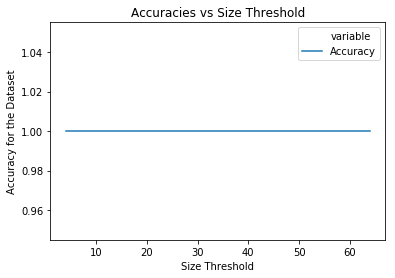

In [468]:
cv = KFold(n_splits=5, random_state=30, shuffle=False)
for train_index, test_index in cv.split(CategoricalValue):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

# Splitting the data set based on K fold 5 and finding the accuracy
    X_train, X_test, y_train, y_test = CategoricalValue[train_index], CategoricalValue[test_index], VectorValue[train_index], VectorValue[test_index]
    
    decisionTreeaccuracies = panda.DataFrame(columns=['size_threshold','Accuracy'])
    for size_threshold in range(4,65,2):
        decisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=size_threshold,criterion='entropy').fit(X_train, y_train)
        accuracy = numpy.round(decisionTreeClassifier.score(X_test, y_test),4)
        decisionTreeaccuracies = decisionTreeaccuracies.append({'size_threshold' : size_threshold,'Accuracy' : accuracy},ignore_index=True)
    print(decisionTreeaccuracies.head(5))
    seasns.lineplot(x='size_threshold',y='value',hue='variable',
               data=decisionTreeaccuracies.melt(id_vars=['size_threshold'],value_vars=['Accuracy']),
               ci=0)
    pyplot.xlabel('Size Threshold')
    pyplot.ylabel('Accuracy for the Dataset')
    pyplot.title('Accuracies vs Size Threshold')
    pyplot.show();

In [469]:
# =====================================Naive Bayes
###Note: We can not use the MultonomialNB classifier, as it doesn't transform the non-negative matrix factorization, hence using
### Gaussian

cv = KFold(n_splits=5, random_state=30, shuffle=False)
for train_index, test_index in cv.split(CategoricalValue):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

# Splitting the data set based on K fold 5 and finding the accuracy
    X_train, X_test, y_train, y_test = CategoricalValue[train_index], CategoricalValue[test_index], VectorValue[train_index], VectorValue[test_index]
    
    #Forming the dataframe with column
    naiveBayesAccuracy = panda.DataFrame(columns=['Laplacian Smoothing','accuracy'])
    #Import Gaussian Naive Bayes model
    from sklearn.naive_bayes import GaussianNB
    for k in range(1,50,1):
        #Create a Gaussian Classifier
        model = GaussianNB()
        naiveBayesClassifier = model.fit(X_train, y_train)
        accuracy = numpy.round(naiveBayesClassifier.score(X_test, y_test))
        naiveBayesAccuracy = naiveBayesAccuracy.append({'Laplacian Smoothing' : k,'accuracy' : accuracy},ignore_index=True)
    print(naiveBayesAccuracy.head(1))   



   Laplacian Smoothing  accuracy
0                  1.0       1.0
   Laplacian Smoothing  accuracy
0                  1.0       1.0
   Laplacian Smoothing  accuracy
0                  1.0       1.0
   Laplacian Smoothing  accuracy
0                  1.0       1.0
   Laplacian Smoothing  accuracy
0                  1.0       1.0


   k-value  accuracy
0      1.0      0.83
1      2.0      0.83
2      3.0      0.82
3      4.0      0.82
4      5.0      0.83


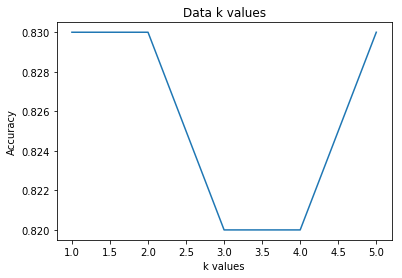

   k-value  accuracy
0      1.0      0.86
1      2.0      0.83
2      3.0      0.87
3      4.0      0.86
4      5.0      0.91


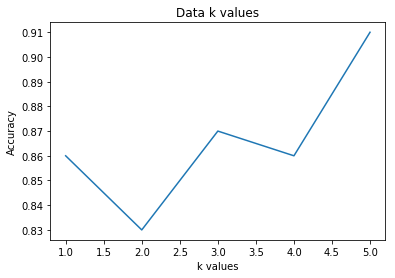

   k-value  accuracy
0      1.0      0.93
1      2.0      0.91
2      3.0      0.90
3      4.0      0.90
4      5.0      0.90


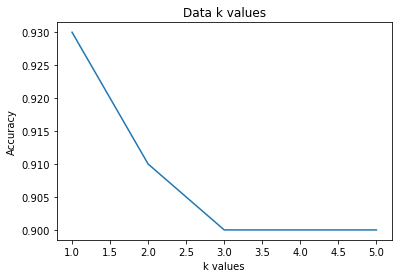

   k-value  accuracy
0      1.0      0.83
1      2.0      0.84
2      3.0      0.87
3      4.0      0.87
4      5.0      0.84


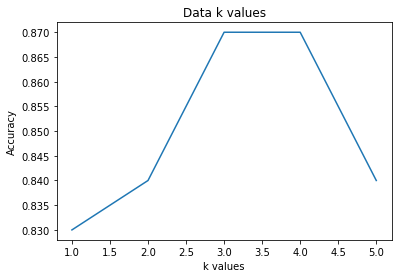

   k-value  accuracy
0      1.0       1.0
1      2.0       1.0
2      3.0       1.0
3      4.0       1.0
4      5.0       1.0


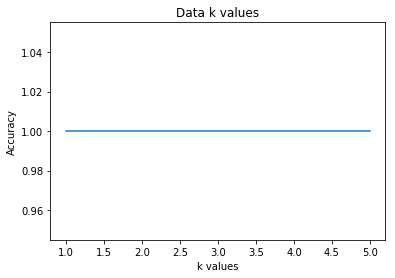

In [470]:
# ===================================== KNN
cv = KFold(n_splits=5, random_state=50, shuffle=False)
for train_index, test_index in cv.split(CategoricalValue):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

# Splitting the data set based on K fold 5 and finding the accuracy
    X_train, X_test, y_train, y_test = CategoricalValue[train_index], CategoricalValue[test_index], VectorValue[train_index], VectorValue[test_index]
    
    #Forming the dataframe with column
    dataset1KNN = panda.DataFrame(columns=['k-value','accuracy'])
    
    from sklearn.neighbors import KNeighborsClassifier
    #Looping through with for knn with the range of 5
    for k in range(1,6,1):
        KNNData1 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        accuracy = np.round(KNNData1.score(X_test, y_test),2)
        dataset1KNN = dataset1KNN.append({'k-value' : k, 'accuracy' : accuracy },ignore_index=True)
    print(dataset1KNN.head(5))
    #Plotting accuracy for kNN Classification of Dataset1
    seasns.lineplot(x='k-value',y='accuracy',data=dataset1KNN,ci=0)
    plt.title('Data k values')
    plt.ylabel('Accuracy')
    plt.xlabel('k values')
    plt.show();


In [471]:
# ===================================== SVC
cv = KFold(n_splits=5, random_state=50, shuffle=False)
for train_index, test_index in cv.split(CategoricalValue):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

# Splitting the data set based on K fold 5 and finding the accuracy
    X_train, X_test, y_train, y_test = CategoricalValue[train_index], CategoricalValue[test_index], VectorValue[train_index], VectorValue[test_index]
    
    #Import svm model
    from sklearn import svm

    #Create a svm Classifier
    clf = svm.SVC(kernel='linear', C=0.025) # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    # Model Accuracy: how often is the classifier correct?
    print("With C=0.025 the Accuracy:",metrics.accuracy_score(y_test, y_pred))
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

With C=0.025 the Accuracy: 0.8309859154929577
[[ 0 12]
 [ 0 59]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.83      1.00      0.91        59

   micro avg       0.83      0.83      0.83        71
   macro avg       0.42      0.50      0.45        71
weighted avg       0.69      0.83      0.75        71

With C=0.025 the Accuracy: 0.9142857142857143
[[ 0  6]
 [ 0 64]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.91      1.00      0.96        64

   micro avg       0.91      0.91      0.91        70
   macro avg       0.46      0.50      0.48        70
weighted avg       0.84      0.91      0.87        70

With C=0.025 the Accuracy: 0.8714285714285714
[[ 0  9]
 [ 0 61]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.87      1.00      0.9

In [472]:
# ===================================== SVC
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(CategoricalValue,VectorValue, test_size=0.3,random_state=100) 

In [473]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=0.025) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [474]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8962264150943396


In [475]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8962264150943396
Recall: 1.0


In [476]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0 11]
 [ 0 95]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.90      1.00      0.95        95

   micro avg       0.90      0.90      0.90       106
   macro avg       0.45      0.50      0.47       106
weighted avg       0.80      0.90      0.85       106



In [477]:
# ======================================Excercise 4 a

In [478]:
from sklearn.model_selection import KFold
svrRBF = svm.SVR(kernel='rbf', C=0.025)
svrRBF100 = svm.SVR(kernel='rbf', C=100)
svrLinear = svm.SVR(kernel='linear', C=0.025)
svrLinear100 = svm.SVR(kernel='linear', C=100)


In [479]:
scores = []
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(CategoricalValue):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = CategoricalValue[train_index], CategoricalValue[test_index], VectorValue[train_index], VectorValue[test_index]
    svrRBF.fit(X_train, y_train)
    scores.append(svrRBF.score(X_test, y_test))
print("Accuracy -> ", np.mean(scores))

Accuracy ->  0.012853387506054026


In [480]:
scores = []
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(CategoricalValue):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = CategoricalValue[train_index], CategoricalValue[test_index], VectorValue[train_index], VectorValue[test_index]
    svrRBF100.fit(X_train, y_train)
    scores.append(svrRBF100.score(X_test, y_test))
print("Accuracy -> ", np.mean(scores))

Accuracy ->  -0.14755549804882157


In [481]:
scores = []
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(CategoricalValue):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = CategoricalValue[train_index], CategoricalValue[test_index], VectorValue[train_index], VectorValue[test_index]
    svrLinear.fit(X_train, y_train)
    scores.append(svrLinear.score(X_test, y_test))
print("Accuracy -> ", np.mean(scores))

Accuracy ->  0.05704570762631378


In [482]:
scores = []
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(CategoricalValue):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = CategoricalValue[train_index], CategoricalValue[test_index], VectorValue[train_index], VectorValue[test_index]
    svrLinear100.fit(X_train, y_train)
    scores.append(svrLinear100.score(X_test, y_test))
print("Accuracy -> ", np.mean(scores))

Accuracy ->  -0.05715105593405088


In [483]:
# ======================================Excercise 4 b
# C: It is the regularization parameter, C, of the error term, it can take value from 0 - 1000.

# kernel: It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’,
# or a callable. The default value is ‘rbf’,.

# degree: It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. 
# The default value is 3, degree is a parameter used when kernel is set to ‘poly’. 
# It’s basically the degree of the polynomial used to find the hyperplane to split the data..